In [3]:
import json
import pandas as pd
import re
import datetime
import numpy as np
import matplotlib.pyplot as plt

with open(r"C:\Users\PC\ITMGT\AD-HOC\transaction-data-adhoc-analysis.json") as f:
    data = json.load(f)

sample_df = pd.DataFrame(data)

sample_df['transaction_items'] = sample_df['transaction_items'].str.split(';')
    
sample_df = sample_df.explode('transaction_items').reset_index(drop=True)
second_split = sample_df['transaction_items'].str.split(',')

#Add three new columns for Brand, Product, Quantity

def brand_index(name):
    index_name = name[0]
    return index_name

sample_df['Brand'] = second_split.apply(brand_index)

def product_index(name):
    index_name = name[1]
    return index_name

sample_df['Product'] = second_split.apply(product_index)

def quantity_index(name):
    index_name = name[2]
    return index_name

sample_df['Quantity'] = second_split.apply(quantity_index)

#Make the quantity column from a str to an int 
sample_df['Quantity'] = sample_df.Quantity.str.replace(r'\D+', '')
#make quantity from str to int
sample_df['Quantity'] = sample_df['Quantity'].astype(int)

#Get months column, you have to convert the transaction_date(str) column to date time 
#sample_df['transaction_date']= pd.to_datetime(sample_df['transaction_date'])
date_col = pd.DatetimeIndex(sample_df['transaction_date'])
sample_df['Month'] = date_col.month

sample_df[["name","transaction_value","transaction_date","Brand","Product","Quantity","Month"]]

new_df = sample_df[["name","transaction_value","transaction_date","transaction_items","Brand","Product","Quantity","Month"]]
new_df

C:\Users\PC\AppData\Local\Temp\ipykernel_32896\3119266410.py:39: FutureWarning: The default value of regex will change from True to False in a future version.
  sample_df['Quantity'] = sample_df.Quantity.str.replace(r'\D+', '')


,name,transaction_value,transaction_date,transaction_items,Brand,Product,Quantity,Month
0,Jennifer Campbell,5196,2022/01/12,"Exotic Extras,Beef Chicharon,(x4)",Exotic Extras,Beef Chicharon,4,1
1,Melissa Kim,12056,2022/01/12,"Exotic Extras,Beef Chicharon,(x3)",Exotic Extras,Beef Chicharon,3,1
2,Melissa Kim,12056,2022/01/12,"HealthyKid 3+,Nutrional Milk,(x4)",HealthyKid 3+,Nutrional Milk,4,1
3,Melissa Kim,12056,2022/01/12,"Candy City,Orange Beans,(x1)",Candy City,Orange Beans,1,1
4,Melissa Kim,5500,2022/01/08,"HealthyKid 3+,Gummy Vitamins,(x3)",HealthyKid 3+,Gummy Vitamins,3,1
...,...,...,...,...,...,...,...,...
166114,Donald Andersen,4280,2022/06/09,"HealthyKid 3+,Nutrional Milk,(x2)",HealthyKid 3+,Nutrional Milk,2,6
166115,Donald Andersen,4280,2022/06/09,"Candy City,Gummy Worms,(x2)",Candy City,Gummy Worms,2,6
166116,Stephanie Russell,2639,2022/06/03,"HealthyKid 3+,Nutrional Milk,(x1)",HealthyKid 3+,Nutrional Milk,1,6
166117,Stephanie Russell,2639,2022/06/03,"Candy City,Gummy Worms,(x3)",Candy City,Gummy Worms,3,6


### 1: Quantity of Item Sold Table

In [4]:
#Make a new table per month 
def series_per_month(month):
    per_month_df = new_df[new_df['Month']==month]
    per_month_quantity = per_month_df.groupby(['Product'])['Quantity'].sum()
    return per_month_quantity

month_number= sample_df['Month'].unique().tolist()

#Makes a new dictionary for all the series 
product_dict = {i:series_per_month(i) for i in month_number}

#From the dictionary, make a new table
quantity_table_df = pd.DataFrame(product_dict)
quantity_table_df.rename(columns={1:"January",2:"February",3:"March",4:"April",5:"May",6:"June"},inplace=True)

#
total_items_sold = new_df.groupby(['Product'])['Quantity'].sum()
quantity_table_df["Total Items Sold"] = total_items_sold

                           
quantity_table_df


,January,February,March,April,May,June,Total Items Sold
Product,,,,,,,
Beef Chicharon,9665,10001,9816,9890,10028,9902,59302
Gummy Vitamins,9681,9980,10145,9842,9948,9980,59576
Gummy Worms,9559,9996,9986,10043,9801,9934,59319
Kimchi and Seaweed,9676,9949,9967,9921,9773,10104,59390
Nutrional Milk,9727,9691,9876,9786,9881,9767,58728
Orange Beans,9774,10037,9611,9914,9964,10106,59406
Yummy Vegetables,9959,10256,9896,9861,9735,9722,59429


### 1: PIE CHART - TOTAL PRODUCTS SOLD

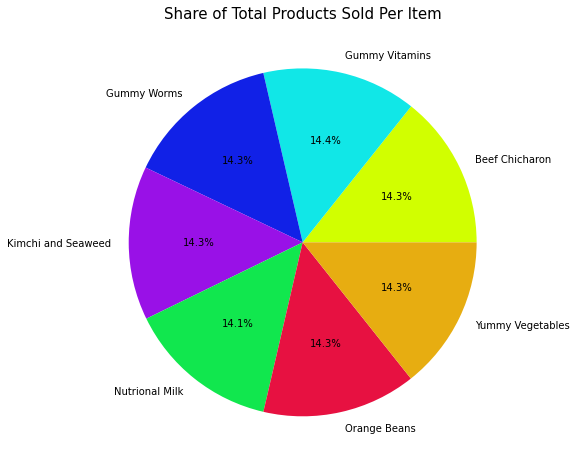

In [5]:
plt.figure(figsize=(12,8))
plt.pie(quantity_table_df['Total Items Sold'],
        labels=quantity_table_df.index,
        autopct='%1.1f%%',
        labeldistance=1.1,
        colors = ['#D1FF00', '#11E7E7', '#1121E7','#9911E7', '#11E74E', '#E71141', '#E7AD11'])
plt.title('Share of Total Products Sold Per Item',fontsize=15)
plt.show();

### 1: BAR GRAPH - TOTAL PRODUCTS SOLD

### 2: Quantity Sold Per Month Table

In [6]:
#2: Total sale value per item per month
#Multiply transaction_value to quantity per month 
    #Filter so that only one quantity is in transaction_value

practice_df = pd.DataFrame(data)

def product_name(text):
    first = text.index(',')
    second = text.index(',', first+1)
    return text[first+1:second]

practice_df['Product'] = practice_df['transaction_items'].apply(product_name)

#Remove all duplicates 
price_chart = practice_df[["transaction_items","Product","transaction_value"]].drop_duplicates(subset=['transaction_items'])
#Remove all that contains ";"
price_chart2 = price_chart[(price_chart['transaction_items'].str.contains(";") == False)]
#Remove all that contains "x1"
price_chart3 = price_chart2[(price_chart2['transaction_items'].str.contains("x1"))]

price_chart4 = price_chart3[['Product','transaction_value']]
price_chart4.set_index('Product',inplace=True)

cost_per_product_series = price_chart4['transaction_value']
#Multiply transaction_value to products sold quantity per item per month 
sold_table_df = quantity_table_df.mul(cost_per_product_series,axis=0)
sold_table_df.rename(columns={"Total Items Sold":"Total Sales Per Item"},inplace=True)
sold_table_df

,January,February,March,April,May,June,Total Sales Per Item
Product,,,,,,,
Beef Chicharon,12554835,12991299,12750984,12847110,13026372,12862698,77033298
Gummy Vitamins,14521500,14970000,15217500,14763000,14922000,14970000,89364000
Gummy Worms,1433850,1499400,1497900,1506450,1470150,1490100,8897850
Kimchi and Seaweed,7731124,7949251,7963633,7926879,7808627,8073096,47452610
Nutrional Milk,19356730,19285090,19653240,19474140,19663190,19436330,116868720
Orange Beans,1945026,1997363,1912589,1972886,1982836,2011094,11821794
Yummy Vegetables,4979500,5128000,4948000,4930500,4867500,4861000,29714500


### 2: PIE CHART - QUANTITY SOLD PER MONTH

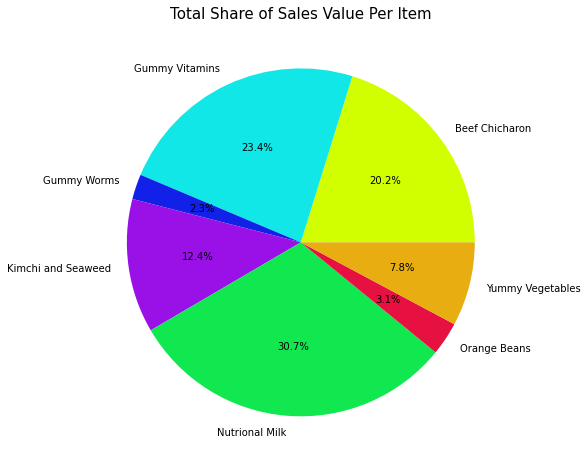

In [7]:
plt.figure(figsize=(12,8))
plt.pie(sold_table_df['Total Sales Per Item'],
        labels=sold_table_df.index,
        autopct='%1.1f%%',
        labeldistance=1.1,
        colors = ['#D1FF00', '#11E7E7', '#1121E7','#9911E7', '#11E74E', '#E71141', '#E7AD11'])
plt.title('Total Share of Sales Value Per Item',fontsize=15)
plt.show();

### BAR GRAPH - QUANTITY SOLD PER MONTH

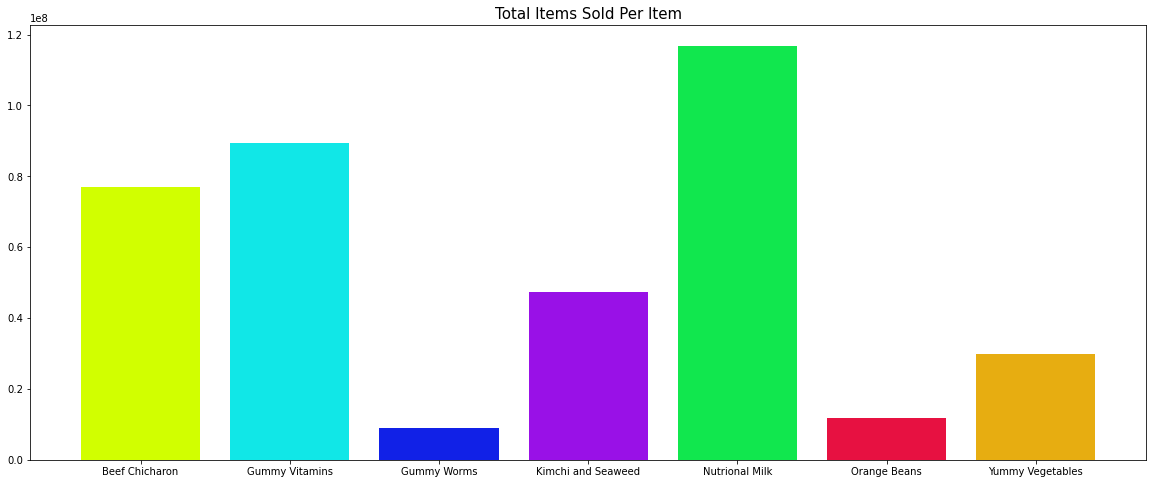

In [8]:
plt.figure(figsize=(20,8))
plt.bar(x = sold_table_df.index,
        height = sold_table_df['Total Sales Per Item'],
        color = ['#D1FF00', '#11E7E7', '#1121E7','#9911E7', '#11E74E', '#E71141', '#E7AD11'])
plt.title('Total Items Sold Per Item',fontsize=15)

plt.show();

### 3: Loyalty Metric Table - REPEATER

In [9]:
#Function for comparing set of previous customers and set of current customers 
def repeating(month):
    current_customers_df = sample_df[sample_df["Month"]==month]
    current_set = set(current_customers_df['name'])
    past_customers_df = sample_df[sample_df["Month"]==month-1]
    past_set = set(past_customers_df['name'])
    return len(current_set & past_set)

#Makes a dictionary for repeating customers per month 
repeater_dict = {i:repeating(i) for i in [1,2,3,4,5,6]}
repeater_series = pd.Series(repeater_dict) 
repeater_series


1       0
2    5172
3    5216
4    5154
5    5110
6    5193
dtype: int64

### 3: Loyalty Metric Table - INACTIVE

In [10]:
#purchased before and not current. 
def inactive(month):
    current_customers_df = sample_df[sample_df["Month"]==month]
    current_set = set(current_customers_df['name'])

    past_customers_df = sample_df[sample_df["Month"]<month]
    past_set = set(past_customers_df['name'])

    return len(past_set - current_set)

inactive_dict = {i:inactive(i) for i in [1,2,3,4,5,6]}
inactive_series = pd.Series(inactive_dict) 
inactive_series

1       0
2    1416
3    1747
4    1909
5    1917
6    1835
dtype: int64

### 3: Loyalty Metric Table - ENGAGED

In [11]:
# Engaged Series-purchased every single month from start to current 
def engaged(month):
    #Makes a set of all the customers per month 
    def customers_per_month(month):
        engaged_per_month = set(sample_df[sample_df["Month"]==month]['name'])
        return engaged_per_month
    
    #Makes a dictionary for each set of unique customer per month
    current_dict = {i:customers_per_month(i) for i in [1,2,3,4,5,6]}
    
    i = 1
    engaged = set(current_dict[i])

    #Gets current_list 
    while i <= month:
        current_list = set(current_dict[i])
        #Compares current_list to the engaged
        engaged = engaged & current_list
        i = i+1
        if i > month:
            return len(engaged)

engaged_dict={i:engaged(i) for i in [1,2,3,4,5,6]}
engaged_series=pd.Series(engaged_dict)
engaged_series

1    6588
2    5172
3    4126
4    3289
5    2667
6    2190
dtype: int64

### 3: Loyalty Metric Table

In [12]:
#Combined all three categories in one dataframe
loyalty_metric_df = pd.DataFrame({'Repeaters':repeater_series,'Inactive':inactive_series,'Engaged':engaged_series}).transpose()
loyalty_metric_df.rename(columns={1:"January",2:"February",3:"March",4:"April",5:"May",6:"June"},inplace=True)
loyalty_metric_df

,January,February,March,April,May,June
Repeaters,0,5172,5216,5154,5110,5193
Inactive,0,1416,1747,1909,1917,1835
Engaged,6588,5172,4126,3289,2667,2190
